In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
X = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
Y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [32]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model()

# 1.

Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

Начальные значения: b0 = 0, b1 = 0
Оптимальные параметры: b0 = -7.638182198894772e-14, b1 = 69.18771139504675
Ошибка модели: 2937.6446095153397
Количество шагов: 10000


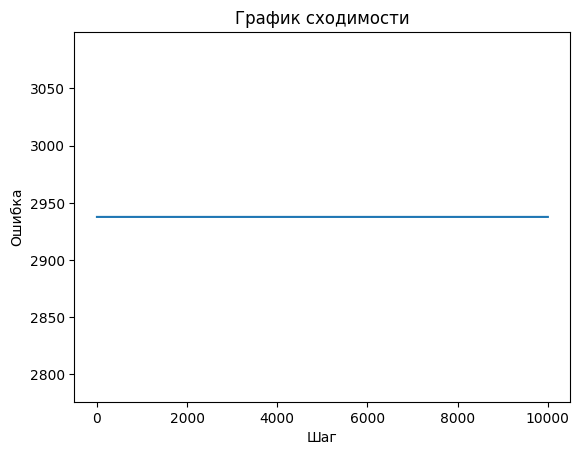

Начальные значения: b0 = 1, b1 = 1
Оптимальные параметры: b0 = -7.638610595934515e-14, b1 = 69.18771139504675
Ошибка модели: 2937.6446095153397
Количество шагов: 10000


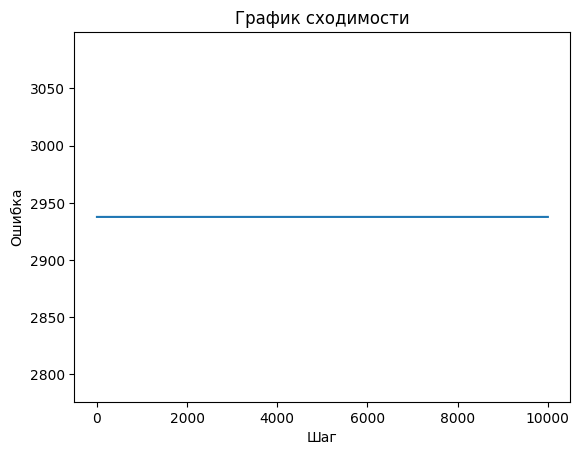

Начальные значения: b0 = -1, b1 = 2
Оптимальные параметры: b0 = -7.638835525781436e-14, b1 = 69.18771139504675
Ошибка модели: 2937.6446095153397
Количество шагов: 10000


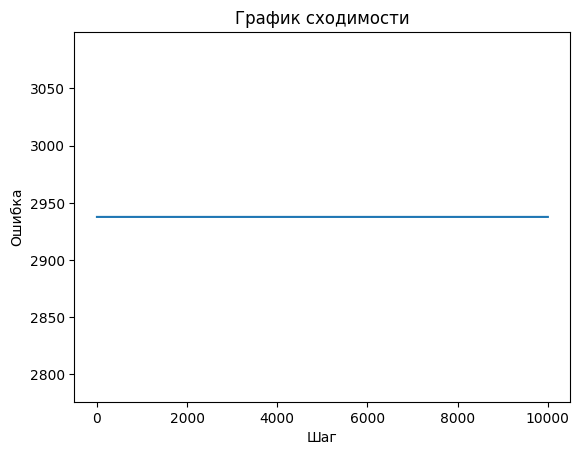

In [33]:
# Функция для тестирования модели с разными начальными значениями
def test_model(initial_b0, initial_b1):
    hyp = Model()
    hyp.b0 = initial_b0
    hyp.b1 = initial_b1

    steps, errors = hyp.fit(X, Y, alpha=0.01, accuracy=0.001, max_steps=5000)

    # Вывод результатов
    print(f"Начальные значения: b0 = {initial_b0}, b1 = {initial_b1}")
    print(f"Оптимальные параметры: b0 = {hyp.b0}, b1 = {hyp.b1}")
    print(f"Ошибка модели: {errors[-1]}")
    print(f"Количество шагов: {len(steps)}")

    # Построение графика ошибки по шагам
    plt.plot(steps, errors)
    plt.xlabel("Шаг")
    plt.ylabel("Ошибка")
    plt.title("График сходимости")
    plt.show()

# Попробуем разные начальные значения
test_model(0, 0)
test_model(1, 1)
test_model(-1, 2)

#2.
Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [34]:
# Значения скорости обучения для тестирования
learning_rates = [0.001, 0.01, 0.1, 0.5, 1, 2, 5]

for alpha in learning_rates:
    hyp = Model()
    initial_b0 = 0
    initial_b1 = 0
    hyp.b0 = initial_b0
    hyp.b1 = initial_b1

    steps, errors = hyp.fit(X, Y, alpha=alpha, accuracy=0.001, max_steps=5000)

    # Проверка на расхождение (если ошибка стала NaN)
    if np.isnan(errors[-1]):
        print(f"Скорость обучения {alpha} приводит к расхождению.")
    else:
        print(f"Скорость обучения {alpha} сходится.")


Скорость обучения 0.001 сходится.
Скорость обучения 0.01 сходится.
Скорость обучения 0.1 сходится.
Скорость обучения 0.5 сходится.
Скорость обучения 1 сходится.
Скорость обучения 2 приводит к расхождению.
Скорость обучения 5 приводит к расхождению.


#3.
Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [35]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            return self.b0 + self.b1 * X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                return self.b0 + self.b1 * X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

    def error(self, X, Y):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                return sum(((self.predict(X.iloc[:, 0]) - Y) ** 2) / (2 * len(X)))
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            X_data = X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                X_data = X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X_data) - Y) / len(X_data)
            dJ1 = sum((self.predict(X_data) - Y) * X_data) / len(X_data)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X_data, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model()

# Пример использования с Series
X_series = pd.Series([1, 2, 3, 4, 5])
Y_series = pd.Series([2, 4, 5, 4, 5])
steps, errors = hyp.fit(X_series, Y_series)
print(f"Оптимальные параметры: b0 = {hyp.b0}, b1 = {hyp.b1}")
print(f"Ошибка модели: {errors[-1]}")

# Пример использования с DataFrame
X_df = pd.DataFrame({'X': [1, 2, 3, 4, 5]})
Y_df = pd.Series([2, 4, 5, 4, 5])
steps, errors = hyp.fit(X_df, Y_df)
print(f"Оптимальные параметры: b0 = {hyp.b0}, b1 = {hyp.b1}")
print(f"Ошибка модели: {errors[-1]}")

Оптимальные параметры: b0 = 1.3888649967101063, b1 = 0.8246713893196956
Ошибка модели: 0.2998782949197513
Оптимальные параметры: b0 = 1.851679675710341, b1 = 0.6964791444938743
Ошибка модели: 0.2510418227372254


#4.
Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливался, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [36]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            return self.b0 + self.b1 * X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                return self.b0 + self.b1 * X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

    def error(self, X, Y):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                return sum(((self.predict(X.iloc[:, 0]) - Y) ** 2) / (2 * len(X)))
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

    def fit(self, X, Y, alpha=0.001, min_error_change=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X_data = X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                X_data = X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

        steps, errors = [], []
        step = 0
        prev_err = float('inf')  # Изначально устанавливаем очень большое значение ошибки
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X_data) - Y) / len(X_data)
            dJ1 = sum((self.predict(X_data) - Y) * X_data) / len(X_data)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X_data, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            # Проверка на изменение ошибки
            if abs(new_err - prev_err) < min_error_change:
                break

            prev_err = new_err

        return steps, errors

# Пример использования на наших X Y
hyp = Model()
steps, errors = hyp.fit(X, Y)
print(f"Оптимальные параметры: b0 = {hyp.b0}, b1 = {hyp.b1}")
print(f"Ошибка модели: {errors[-1]}")

Оптимальные параметры: b0 = -0.19913636906531443, b1 = 68.98630110483298
Ошибка модели: 0.03937321303112907


#5.
Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [37]:
# код в прошлой ячейке уже рассчитан на это

#6.
Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [38]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            return self.b0 + self.b1 * X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                return self.b0 + self.b1 * X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

    def error(self, X, Y):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                return sum(((self.predict(X.iloc[:, 0]) - Y) ** 2) / (2 * len(X)))
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

    def fit(self, X, Y, initial_alpha=1.0, min_error_change=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X_data = X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                X_data = X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

        steps, errors = [], []
        step = 0
        prev_err = float('inf')
        alpha = initial_alpha

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X_data) - Y) / len(X_data)
            dJ1 = sum((self.predict(X_data) - Y) * X_data) / len(X_data)

            b0_temp, b1_temp = self.b0, self.b1
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X_data, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if abs(new_err - prev_err) < min_error_change:
                break

            if new_err > prev_err:
                alpha /= 2.0
                self.b0, self.b1 = b0_temp, b1_temp
            prev_err = new_err

        return steps, errors

# Пример использования на наших X Y
hyp = Model()
steps, errors = hyp.fit(X, Y)
print(f"Оптимальные параметры: b0 = {hyp.b0}, b1 = {hyp.b1}")
print(f"Ошибка модели: {errors[-1]}")

Оптимальные параметры: b0 = 0.00010670107842085917, b1 = 69.18748023941718
Ошибка модели: 4.1772608368551725e-08


#7.
Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Оптимальные параметры: b0 = 0.00010670107842085917, b1 = 69.18748023941718
Ошибка модели: 4.1772608368551725e-08


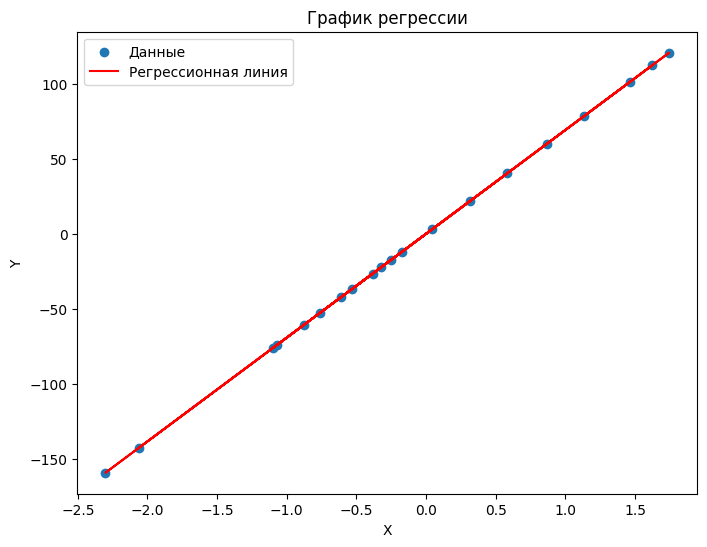

In [39]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            return self.b0 + self.b1 * X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                return self.b0 + self.b1 * X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

    def error(self, X, Y):
        # Проверяем, является ли X объектом Series или DataFrame
        if isinstance(X, pd.Series):
            return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                return sum(((self.predict(X.iloc[:, 0]) - Y) ** 2) / (2 * len(X)))
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

    def fit(self, X, Y, initial_alpha=1.0, min_error_change=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X_data = X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                X_data = X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

        steps, errors = [], []
        step = 0
        prev_err = float('inf')
        alpha = initial_alpha

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X_data) - Y) / len(X_data)
            dJ1 = sum((self.predict(X_data) - Y) * X_data) / len(X_data)

            b0_temp, b1_temp = self.b0, self.b1
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X_data, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if abs(new_err - prev_err) < min_error_change:
                break

            if new_err > prev_err:
                alpha /= 2.0
                self.b0, self.b1 = b0_temp, b1_temp
            prev_err = new_err

        return steps, errors

    def plot_regression(self, X, Y):
        if isinstance(X, pd.Series):
            X_data = X
        elif isinstance(X, pd.DataFrame):
            if X.shape[1] == 1:
                X_data = X.iloc[:, 0]
            else:
                raise ValueError("DataFrame должен содержать только один столбец данных.")
        else:
            raise ValueError("X должен быть Series или DataFrame.")

        plt.figure(figsize=(8, 6))
        plt.scatter(X_data, Y, label="Данные")
        plt.plot(X_data, self.predict(X_data), color='red', label="Регрессионная линия")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.title("График регрессии")
        plt.show()

# Пример использования на наших X Y
hyp = Model()
steps, errors = hyp.fit(X, Y)
print(f"Оптимальные параметры: b0 = {hyp.b0}, b1 = {hyp.b1}")
print(f"Ошибка модели: {errors[-1]}")
hyp.plot_regression(X, Y)